### Codio Activity 23.1: Basic Neural Net for Image Data

**Expected Time = 60 minutes**

**Total Points = 30**

This activity focuses on using a basic neural net architecture to predict handwritten digit labels.  Using the basic architecture you will also explore data augmentation using simple transformations of the images to create new data for the network.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

2022-09-17 05:11:21.196289: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

### The Dataset

The data is included with the `datasets` module of the `keras` library and contains observations that are 28 x 28 pixel images of handwritten digits.  The labels correspond to the actual digit, forming a 10 category classification problem for you.  Below, the data is loaded and reshaped in anticipation of the neural network architecture.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

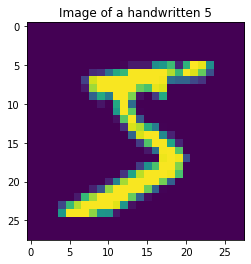

In [4]:
plt.imshow(X_train[0])
plt.title(f'Image of a handwritten {y_train[0]}');

[Back to top](#-Index)

### Problem 1

#### Using a Convolutional Architecture

**10 Points**

Below, build a convolutional neural net that first uses `Flatten` to flatten the images and then a single `Dense` hidden layer with 100 nodes and `relu` activation as well as an appropriately sized output layer.  Compile the model with `accuracy` as your metric and fit the model using 20 epochs, including `X_test, Y_test` as your validation data.  

Assign the fit history to the `history` variable below.

HINT: when you compile the model, use `categorical_crossentropy` as the loss

In [5]:
### GRADED
tf.random.set_seed(42)
model = ''
history = ''

    
# YOUR CODE HERE
#raise NotImplementedError()
model = Sequential([
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs = 20, verbose = 0, validation_data=(X_test, Y_test))

### ANSWER CHECK
print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])

2022-09-17 05:11:24.728380: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


0.9765499830245972
0.9624000191688538


[Back to top](#-Index)

### Problem 2

#### Data Augmentation

**10 Points**

One way to attempt a model improvement is to create new inputs to the network based on transformed versions of the original data.  Below, you are to use the `ImageDataGenerator` from `keras` to create a new version of the train and test data that performs both a horizontal and vertical flip of the images as `gen` below.  

You will have to use the `.flow` method of the generator and assign the new objects as `train_gen` and `test_gen` below.  

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Text(0.5, 0.98, 'Augmented and Original Digit Data')

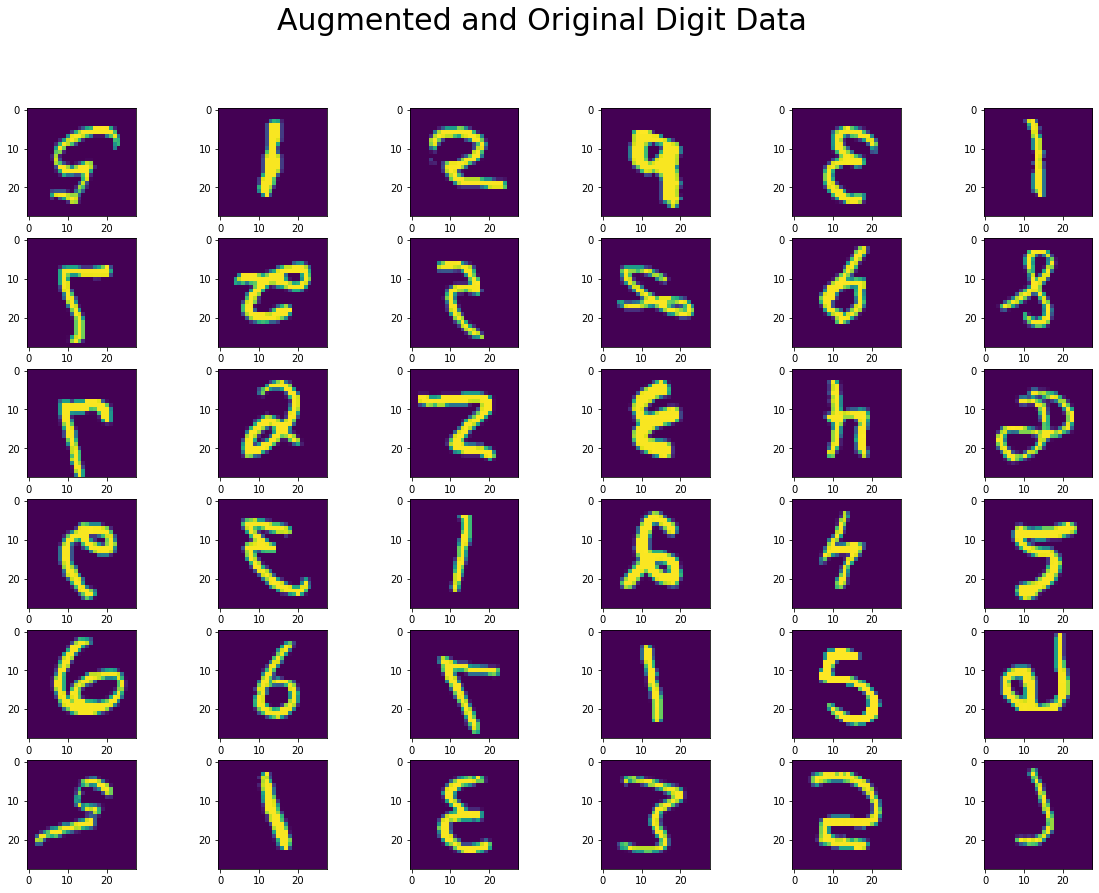

In [9]:
### GRADED
tf.random.set_seed(42)
gen = ''
train_gen = ''
test_gen = ''

    
# YOUR CODE HERE
#raise NotImplementedError()
tf.random.set_seed(42)
gen = ImageDataGenerator(horizontal_flip = True, vertical_flip = True)
train_gen = gen.flow(x=X_train, y=Y_train)
test_gen = gen.flow(x=X_test, y=Y_test)

## ANSWER CHECK
#UNCOMMENT TO VISUALIZE
fig, ax = plt.subplots(6, 6, figsize = (20, 14))
for i in range(6):
    for j in range(6):
        pic = train_gen.next()
        ax[i, j].imshow(pic[0][0].reshape(28, 28))
plt.suptitle("Augmented and Original Digit Data", fontsize = 30)

[Back to top](#-Index)

### Problem 3

#### Training a model on the augmented data

**10 Points**

Now, your aim is to compare the performance of the convolutionalarchitecture on the augmented version of the data.  You can replace `X_train` and `X_test` in your model fitting with `train_gen` and `test_gen`.  Create a new model named `aug_model` with the identical architecture to the first network in **Problem 1**.  Train this on the augmented data and assign as the fit history as the variable `augmented_history` below.

In [10]:
### GRADED
tf.random.set_seed(42)
aug_model = ''
augmented_history = ''

    
# YOUR CODE HERE
#raise NotImplementedError()
tf.random.set_seed(42)
aug_model = Sequential([
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

aug_model.compile(loss="categorical_crossentropy", metrics=["accuracy"])
augmented_history = aug_model.fit(train_gen, epochs = 20, verbose = 0, validation_data=test_gen)

### ANSWER CHECK
print(augmented_history.history['accuracy'][-1])
print(augmented_history.history['val_accuracy'][-1])

0.8631666898727417
0.8616999983787537


Note the performance difference and think about why it either improved or declined after using the augmented data. 